### Phương pháp Lasso

In [117]:
# Sử dụng GridSearchCV để tìm alpha tốt nhất

# Định nghĩa các giá trị alpha để thử nghiệm
alpha_values = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Khởi tạo mô hình Lasso
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=alpha_values, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Tìm alpha tốt nhất
best_alpha = grid_search.best_params_['alpha']
print(f'Alpha tốt nhất cho Lasso: {best_alpha}')

Alpha tốt nhất cho Lasso: 1


In [118]:
# Khởi tạo mô hình Lasso
lasso_model = Lasso(alpha=0.1)  # Thay đổi alpha nếu cần

# Huấn luyện mô hình trên dữ liệu train
lasso_model.fit(X_train, y_train)

# Dự đoán trên tập train, validation, và test
y_train_pred_lasso = lasso_model.predict(X_train)
y_validation_pred_lasso = lasso_model.predict(X_validation)
y_test_pred_lasso = lasso_model.predict(X_test)

joblib.dump(lasso_model, '../Data/lasso_regression_model.pkl')

# Đánh giá trên tập train
r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso = evaluate_model(y_train, y_train_pred_lasso)

# Đánh giá trên tập validation
r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso = evaluate_model(y_validation, y_validation_pred_lasso)

# Đánh giá trên tập test
r2_test_lasso, mse_test_lasso, rmse_test_lasso, mae_test_lasso = evaluate_model(y_test, y_test_pred_lasso)

# Kết quả
results_lasso = {
    'Metric': ['Lasso-R²', 'Lasso-MSE', 'Lasso-RMSE', 'Lasso-MAE'],
    'Train': [r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso],
    'Validation': [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
    'Test': [r2_test_lasso, mse_test_lasso, rmse_test_lasso, mae_test_lasso]
}

results_lasso_df = pd.DataFrame(results_lasso)
results_lasso_df

,Metric,Train,Validation,Test
0,Lasso-R²,0.891182,0.890579,0.877382
1,Lasso-MSE,0.000211,0.000215,0.000242
2,Lasso-RMSE,0.014512,0.014668,0.015558
3,Lasso-MAE,0.011478,0.011591,0.012114


In [119]:
print('intercept b is: {}'.format(lasso_model.intercept_))
print('coeff a is: {}'.format(lasso_model.coef_))

intercept b is: 0.023902224877337334
coeff a is: [2.46395720e-10 2.98382763e-11]


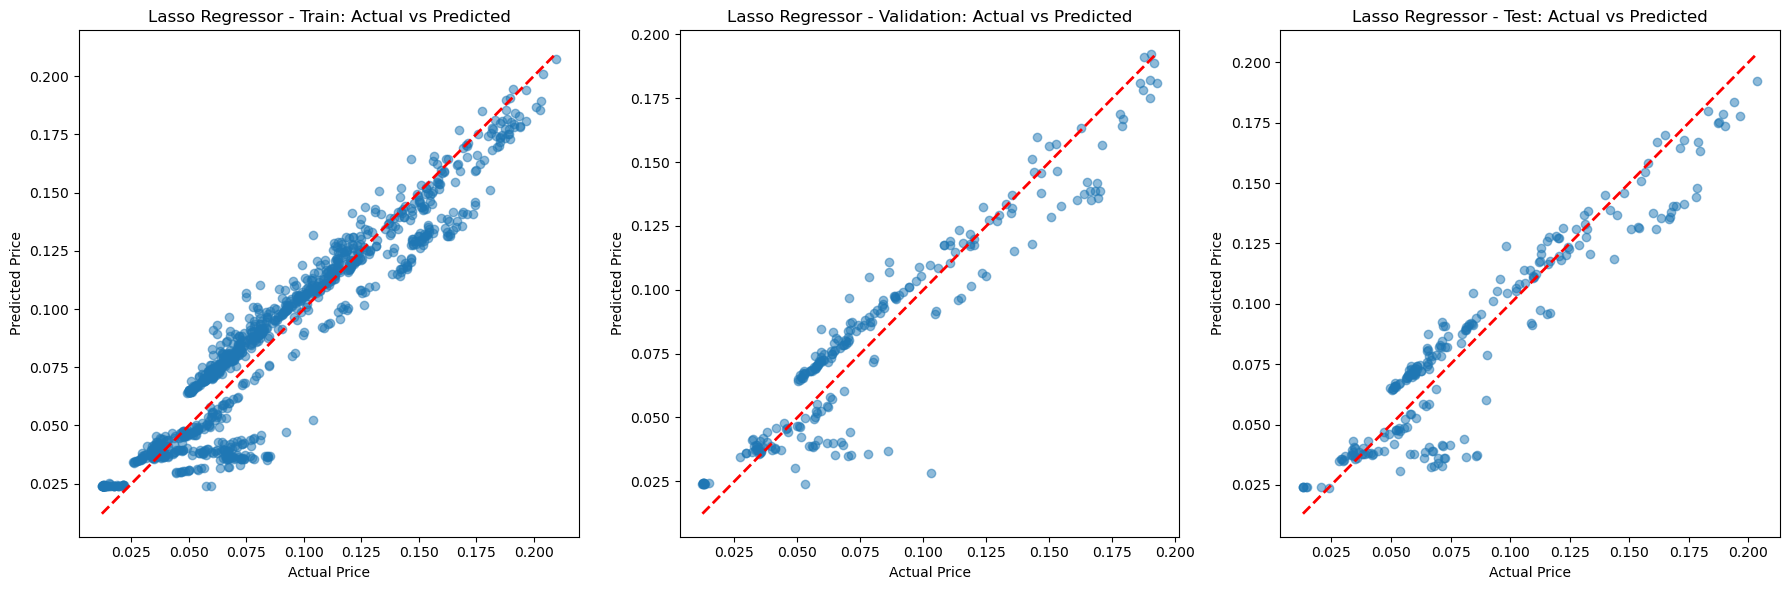

In [120]:
# Vẽ biểu đồ phân tán cho tập train, validation và test cho Lasso Regression
# Biểu đồ phân tán cho từng tập dữ liệu
plt.figure(figsize=(18, 6))

# Tập train
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred_lasso, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Lasso Regressor - Train: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Tập validation
plt.subplot(1, 3, 2)
plt.scatter(y_validation, y_validation_pred_lasso, alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'r--', lw=2)
plt.title('Lasso Regressor - Validation: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Tập test
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Lasso Regressor - Test: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Tinh chỉnh và hiển thị
plt.tight_layout()
plt.show()
